# Implementation of K-fold & Stratified cross validation

importing the library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

Mount the drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/HW1/heart.csv')
dataset.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
X = dataset.iloc[:,0:13].values
Y = dataset.iloc[:,13:14].values
x = dataset.iloc[:,0:13]
y = dataset.iloc[:,13:14]
print("X_shape:",x.shape)
print("Y_shape:",y.shape)

X_shape: (303, 13)
Y_shape: (303, 1)


In [11]:
print("Attributes: ")
for col in x.columns:
  print(col)
print("\n")
print("class:")
for col in y.columns:
  print(col)

Attributes: 
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


class:
target


In [12]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = SC.fit_transform(X)

# K-fold cross validation for logistic regression

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [14]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)

Accuracy

In [22]:
accuracy_lr = cross_val_score(classifier_lr,X,Y,cv =10)
print(accuracy_lr)
print("mean_accuracy_of_lr = ",accuracy_lr.mean())

[0.87096774 0.80645161 0.83870968 0.9        0.83333333 0.76666667
 0.86666667 0.83333333 0.7        0.7       ]
mean_accuracy_of_lr =  0.8116129032258066


precision

In [23]:
precision_lr = cross_val_score(classifier_lr,X,Y,cv=10, scoring = 'precision_macro')
print(precision_lr)
print("mean_prcision_of_lr = ", precision_lr.mean())

[0.9047619  0.81140351 0.83974359 0.89732143 0.83333333 0.79665072
 0.875      0.8492823  0.72222222 0.69909502]
mean_prcision_of_lr =  0.822881402438291


recall_score

In [25]:
recall_lr = cross_val_score(classifier_lr,X,Y,cv=10, scoring= 'recall_macro')
print(recall_lr)
print("mean_recall_of_lr = ", recall_lr.mean())

[0.85714286 0.79831933 0.83403361 0.90271493 0.82579186 0.77678571
 0.86160714 0.82589286 0.6875     0.69642857]
mean_recall_of_lr =  0.8066216871363932


F1_score

In [26]:
f1_lr = cross_val_score(classifier_lr,X,Y,scoring = 'f1_macro',cv=10)
print(f1_lr)
print("f1_of_lr = ",f1_lr.mean())

[0.86403509 0.80128205 0.83597884 0.8989899  0.82857143 0.76430976
 0.86425339 0.82857143 0.6827262  0.6969697 ]
f1_of_lr =  0.8065687790522895


# Stratified K-fold cross vallidation

In [29]:
from sklearn.model_selection import StratifiedKFold
# define k-fold
skf = StratifiedKFold(n_splits = 10,random_state = 0, shuffle = False)

In [31]:
skf.get_n_splits(X,Y)

10

In [41]:
# Model Performace
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = []
precision = []
recall = []
f1_scores = []
for train_index,test_index in skf.split(X,Y):
  X_train,X_test = X[train_index],X[test_index]
  Y_train,Y_test = Y[train_index],Y[test_index]
  classifier_lr.fit(X_train,Y_train)
  y_pred_lr = classifier_lr.predict(X_test)
  ac = accuracy_score(Y_test,y_pred_lr)
  pc = precision_score(Y_test,y_pred_lr)
  rc = recall_score(Y_test,y_pred_lr)
  f1 = f1_score(Y_test,y_pred_lr)
  accuracy.append(ac)
  precision.append(pc)
  recall.append(rc)
  f1_scores.append(f1)
print("accuracy is = ", accuracy)

print("precision is = ", precision)

print("recall is = ", recall)

print("f1_scores is = ", f1_scores)



accuracy is =  [0.8709677419354839, 0.8064516129032258, 0.8387096774193549, 0.9, 0.8333333333333334, 0.7666666666666667, 0.8666666666666667, 0.8333333333333334, 0.7, 0.7]
precision is =  [0.8095238095238095, 0.7894736842105263, 0.8333333333333334, 0.9375, 0.8333333333333334, 0.9090909090909091, 0.8333333333333334, 0.7894736842105263, 0.6666666666666666, 0.7058823529411765]
recall is =  [1.0, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.625, 0.9375, 0.9375, 0.875, 0.75]
f1_scores is =  [0.8947368421052632, 0.8333333333333333, 0.8571428571428571, 0.9090909090909091, 0.8571428571428571, 0.7407407407407406, 0.8823529411764706, 0.8571428571428572, 0.7567567567567567, 0.7272727272727272]


In [43]:
# import necessary library
from scipy import interp
from sklearn.metrics import roc_curve,auc
import matplotlib.patches as patches
import seaborn as sn

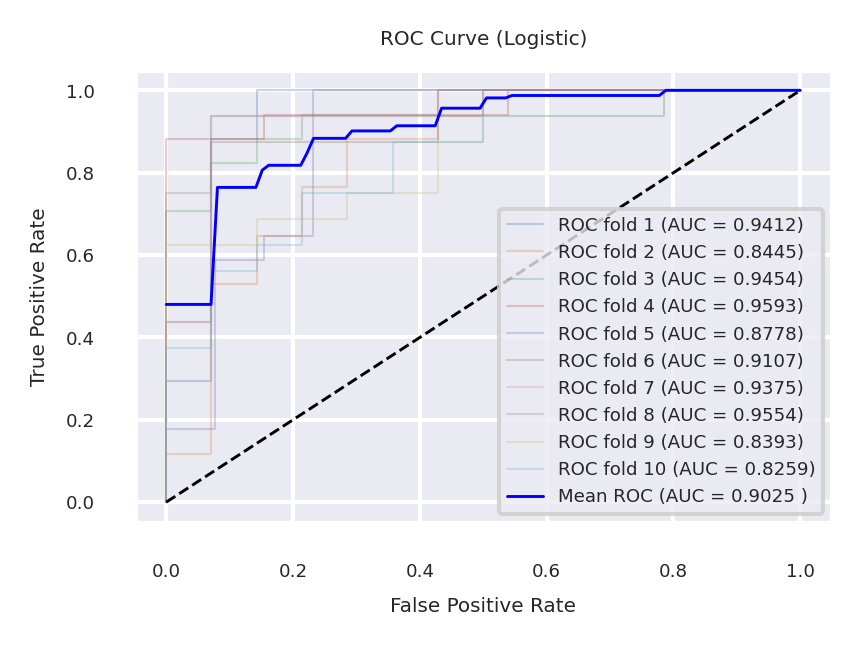

In [48]:
random_state = np.random.RandomState(0)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
cv = StratifiedKFold(n_splits=10,shuffle=False)



tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)


plt.figure(figsize=(3,2), dpi=300)
sn.set(font_scale=.4)
i = 1
for train,test in cv.split(X,y):
    prediction =classifier_lr.fit(X[train],Y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=.5, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = .7,color = 'black')
sn.set_style("darkgrid")
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Mean ROC (AUC = %0.4f )' % (mean_auc),lw=.7, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

K-fold validation for SVM

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [52]:
# importing svm library
from sklearn.svm import SVC
classifier_sv = SVC(random_state= 0, kernel = 'rbf', probability = True)

In [55]:
#accuracy of svm
accuracy_sv = cross_val_score(classifier_sv,X,Y,cv =10)
print(accuracy_sv)
print("mean_accuracy_of_sv = ",accuracy_sv.mean())

[0.83870968 0.83870968 0.83870968 0.93333333 0.86666667 0.83333333
 0.83333333 0.8        0.7        0.8       ]
mean_accuracy_of_sv =  0.8282795698924732


In [58]:
#precision of svm
precision_sv = cross_val_score(classifier_sv,X,Y,cv =10,scoring= 'precision_macro')
print(accuracy_sv)
print("mean_precision_of_svm = ",accuracy_sv.mean())

[0.83870968 0.83870968 0.83870968 0.93333333 0.86666667 0.83333333
 0.83333333 0.8        0.7        0.8       ]
mean_precision_of_svm =  0.8282795698924732


In [62]:
#recall of svm
recall_sv = cross_val_score(classifier_sv,X,Y,cv =10,scoring= 'recall_macro')
print(recall_sv)
print("mean_recall_of_svm = ",recall_sv.mean())

[0.82773109 0.84033613 0.82773109 0.9321267  0.85520362 0.84375
 0.83482143 0.79017857 0.6875     0.79464286]
mean_recall_of_svm =  0.8234021493212669


In [63]:
#f1 score of svm
f1_sv = cross_val_score(classifier_sv,X,Y,cv =10,scoring= 'f1_macro')
print(f1_sv)
print("mean_recall_of_svm = ",f1_sv.mean())

[0.83243243 0.83803553 0.83243243 0.9321267  0.86111111 0.83164983
 0.83314794 0.79166667 0.6827262  0.79638009]
mean_recall_of_svm =  0.823170893593678


Stratified k-fold validation for SVM

In [65]:
from sklearn.model_selection import StratifiedKFold
# define k-fold
skf = StratifiedKFold(n_splits = 10,random_state = 0, shuffle = False)

In [68]:
# Model Performace
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = []
precision = []
recall = []
f1_scores = []
for train_index,test_index in skf.split(X,Y):
  X_train,X_test = X[train_index],X[test_index]
  Y_train,Y_test = Y[train_index],Y[test_index]
  classifier_sv.fit(X_train,Y_train)
  y_pred_sv = classifier_sv.predict(X_test)
  ac = accuracy_score(Y_test,y_pred_sv)
  pc = precision_score(Y_test,y_pred_sv)
  rc = recall_score(Y_test,y_pred_sv)
  f1 = f1_score(Y_test,y_pred_sv)
  accuracy.append(ac)
  precision.append(pc)
  recall.append(rc)
  f1_scores.append(f1)
print("accuracy is = ", accuracy)

print("precision is = ", precision)

print("recall is = ", recall)

print("f1_scores is = ", f1_scores)

accuracy is =  [0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.9333333333333333, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8, 0.7, 0.8]
precision is =  [0.8, 0.875, 0.8, 0.9411764705882353, 0.8421052631578947, 1.0, 0.8666666666666667, 0.75, 0.6666666666666666, 0.7777777777777778]
recall is =  [0.9411764705882353, 0.8235294117647058, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.6875, 0.8125, 0.9375, 0.875, 0.875]
f1_scores is =  [0.8648648648648648, 0.8484848484848485, 0.8648648648648648, 0.9411764705882353, 0.8888888888888888, 0.8148148148148148, 0.8387096774193549, 0.8333333333333334, 0.7567567567567567, 0.823529411764706]


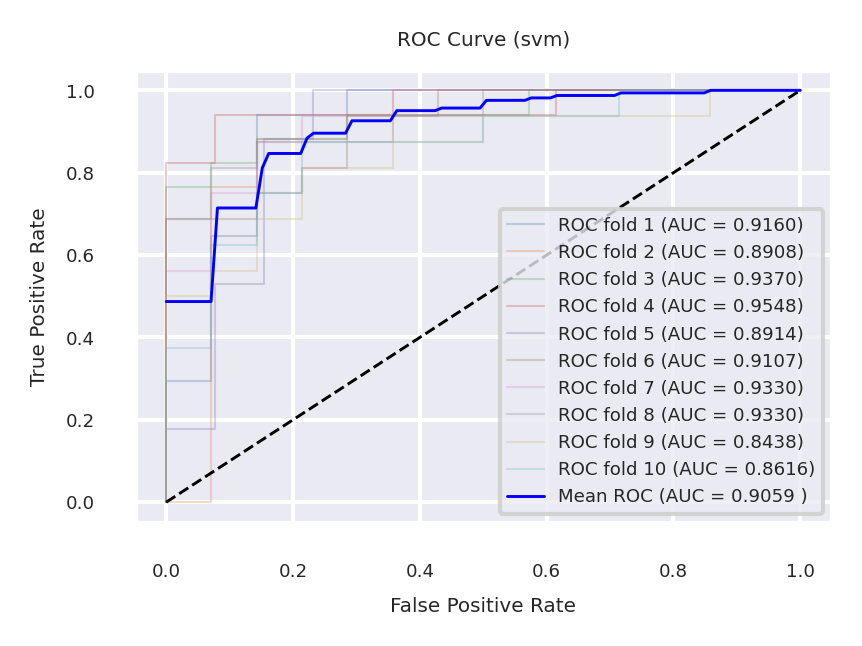

In [71]:
# roc curve for stratified k-fold in SVM
random_state = np.random.RandomState(0)
from sklearn.svm import SVC
clf = SVC(random_state= 0, kernel = 'rbf', probability = True)
cv = StratifiedKFold(n_splits=10,shuffle=False)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)


plt.figure(figsize=(3,2), dpi=300)
sn.set(font_scale=.4)
i = 1
for train,test in cv.split(X,y):
    prediction =classifier_sv.fit(X[train],Y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=.5, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = .7,color = 'black')
sn.set_style("darkgrid")
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Mean ROC (AUC = %0.4f )' % (mean_auc),lw=.7, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (svm)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()